# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

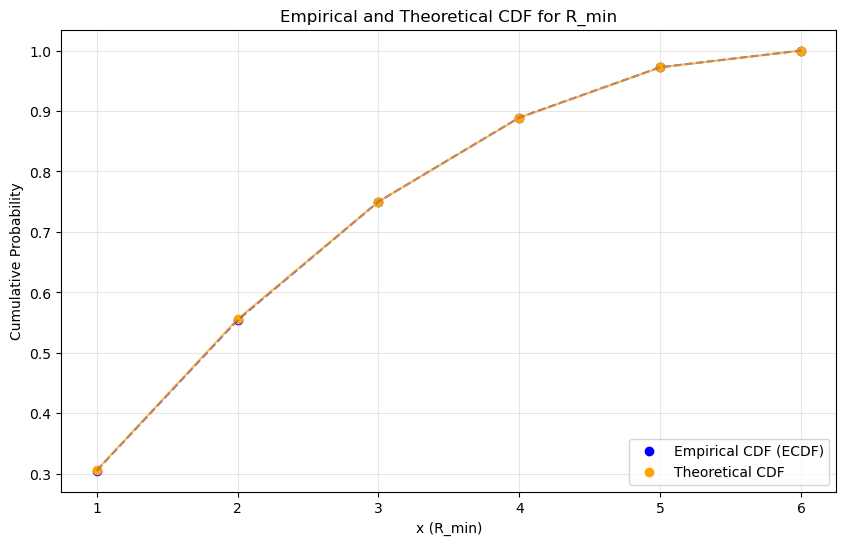

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the possible faces of a six-sided die
faces = np.array([1, 2, 3, 4, 5, 6])

# Step 2: Compute the theoretical PDF and CDF of R_min
# Initialize an array to hold probabilities for each face value
pdf = np.zeros(6)

# Nested loops to calculate R_min probabilities for all 36 outcomes
for i in range(6):          # Loop through the first die face
    for j in range(6):      # Loop through the second die face
        min_ij = np.min([faces[i], faces[j]])  # Compute R_min for this pair
        pdf[min_ij - 1] += 1                   # Increment count for R_min value

# Normalize counts to probabilities
pdf = pdf / 36  # Since there are 36 total outcomes

# Compute the cumulative distribution function (CDF: cumulative sum of the PDF)
cdf = np.cumsum(pdf)

# Step 3: Simulate R_min using random dice rolls
# Number of simulations
N = 100000
# Randomly roll two dice N times
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
# Calculate R_min for each pair of dice rolls
min_roll = np.minimum(d1, d2)

# Step 4: Compute the empirical cumulative distribution function (ECDF)
# Initialize an array to hold ECDF values
ecdf = np.zeros(6)
for i in range(6):
    # ECDF: Fraction of simulated values <= face[i]
    ecdf[i] = np.sum(min_roll <= faces[i]) / N

# Step 5: Visualize the results
# Comparison of CDF (theoretical) and ECDF (empirical)
plt.figure(figsize=(10, 6))
plt.scatter(faces, ecdf, label='Empirical CDF (ECDF)', color='blue')
plt.plot(faces, ecdf, linestyle='--', color='blue', alpha=0.7)
plt.scatter(faces, cdf, label='Theoretical CDF', color='orange')
plt.plot(faces, cdf, linestyle='-', color='orange', alpha=0.7)

# Add labels, legend, and title
plt.xlabel("x (R_min)")
plt.ylabel("Cumulative Probability")
plt.title('Empirical and Theoretical CDF for R_min')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

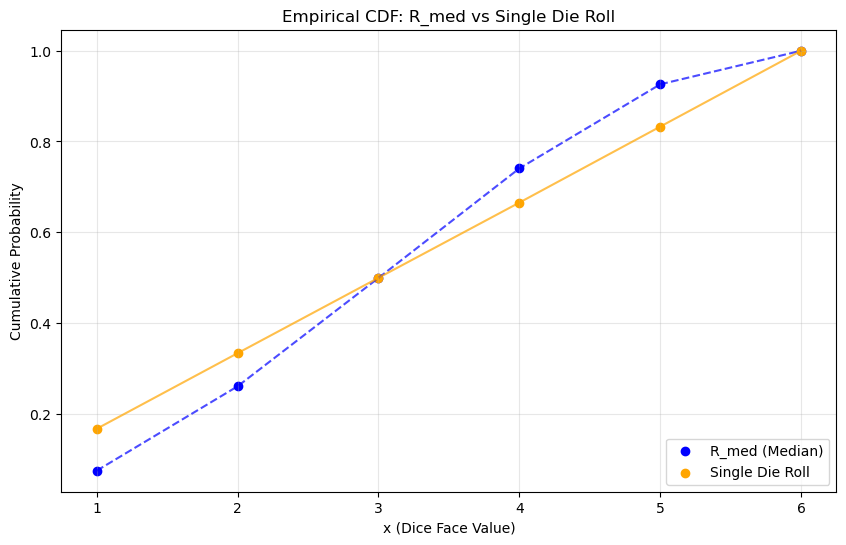

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the possible faces of a six-sided die
faces = np.array([1, 2, 3, 4, 5, 6])

# Step 2: Simulate rolling three dice multiple times
N = 100000 

# Randomly roll three dice N times
d1 = np.random.choice(faces, size=N)  # Rolls for the first die
d2 = np.random.choice(faces, size=N)  # Rolls for the second die
d3 = np.random.choice(faces, size=N)  # Rolls for the third die

# Step 3: Compute R_med (the median of the three dice)
med_roll = np.median(np.column_stack((d1, d2, d3)), axis=1).astype(int)

# Step 4: Compute the expected value of R_med
expected_value = np.mean(med_roll)  # Average value of the simulated R_med

# Step 5: Compute the Empirical CDF (ECDF) for R_med
ecdf = np.zeros(6)  # Initialize ECDF values for each face value
for i in range(6):
    # ECDF: Fraction of simulations where R_med <= current face value
    ecdf[i] = np.mean(med_roll <= faces[i])

# Step 6: Compare with Single Die Rolls
# ECDF for a single die roll
single_ecdf = np.zeros(6)
for i in range(6):
    # ECDF: Fraction of simulations where single die roll <= current face value
    single_ecdf[i] = np.mean(d1 <= faces[i])  # Only one die is needed

# Step 7: Visualize the Results
# Plot CDFs for R_med and a single die roll
plt.figure(figsize=(10, 6))
plt.scatter(faces, ecdf, label='R_med (Median)', color='blue')
plt.plot(faces, ecdf, linestyle='--', color='blue', alpha=0.7)
plt.scatter(faces, single_ecdf, label='Single Die Roll', color='orange')
plt.plot(faces, single_ecdf, linestyle='-', color='orange', alpha=0.7)

# Add labels, legend, and title
plt.xlabel("x (Dice Face Value)")
plt.ylabel("Cumulative Probability")
plt.title('Empirical CDF: R_med vs Single Die Roll')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

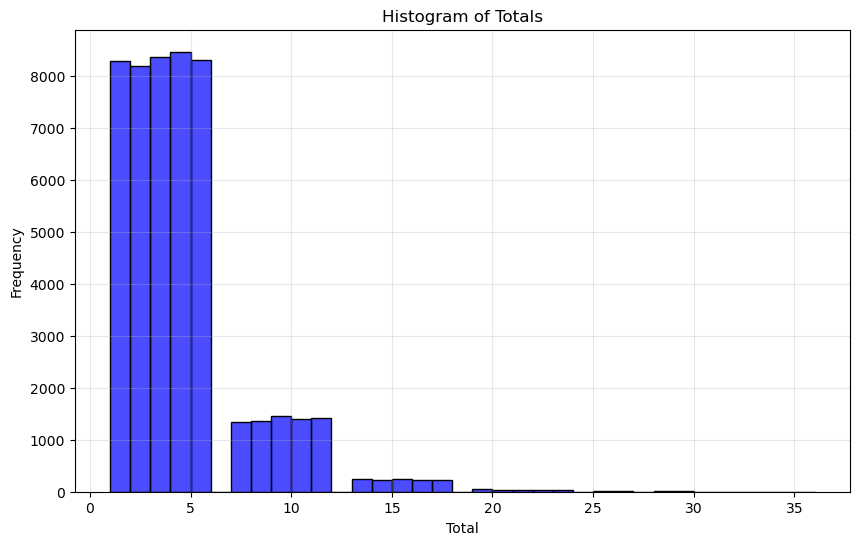

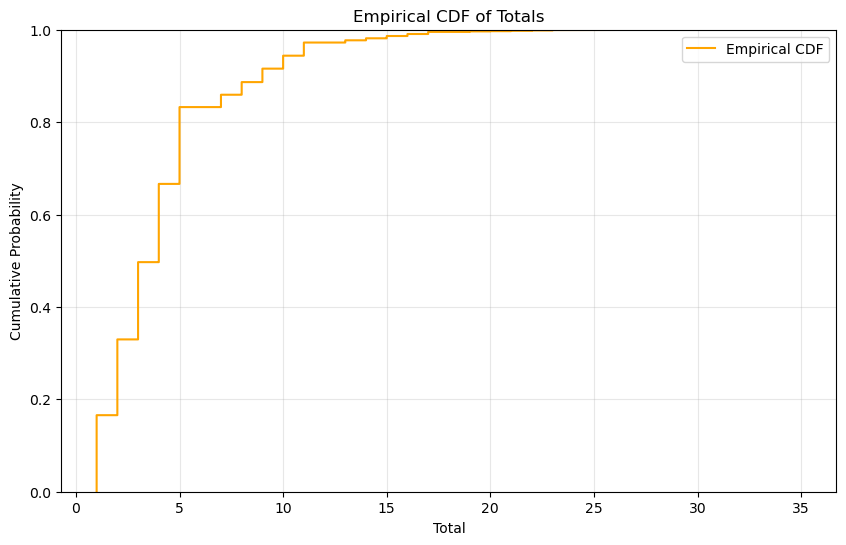

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the simulation parameters
N = 50000  
faces = np.array([1, 2, 3, 4, 5, 6]) 

# Step 2: Simulate the process
results = []  # To store the total sum from each simulation
for _ in range(N):
    total = 0  # Initialize total sum for the current simulation
    while True:
        roll = np.random.choice(faces)  # Roll the die
        total += roll  # Add the roll value to the total
        if roll < 6:  # Stop if the roll is not 6
            break
    results.append(total)  # Store the final sum for the current simulation

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results, columns=["Total"])

# Step 3: Compute the expected value
expected_value = np.mean(results)  # Average total sum

# Step 4: Visualize the results
# Plot the histogram of totals
plt.figure(figsize=(10, 6))
sns.histplot(results, bins=range(1, max(results) + 2), kde=False, color="blue", alpha=0.7)
plt.xlabel("Total")
plt.ylabel("Frequency")
plt.title("Histogram of Totals")
plt.grid(alpha=0.3)
plt.show()

# Plot the Empirical CDF
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=results_df, x="Total", color="orange", label="Empirical CDF")
plt.xlabel("Total")
plt.ylabel("Cumulative Probability")
plt.title("Empirical CDF of Totals")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups. 
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

In [11]:
import pandas as pd

data = pd.read_csv('data/mammogram.csv')

data.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [ ]:
# Cross-tabulate treatment and breast_cancer_death
cross_tab = pd.crosstab(data['treatment'], data['breast_cancer_death'])

# Calculate survival rates (proportion of "no" for each treatment group)
cross_tab['survival_rate'] = cross_tab['no'] / (cross_tab['no'] + cross_tab['yes'])

# Difference in survival rates between the two groups
survival_diff = cross_tab.loc['mammogram', 'survival_rate'] - cross_tab.loc['control', 'survival_rate']

cross_tab, survival_diff

'''
Control Group:
Survived: 44,405
Died: 505
Survival Rate: 98.88%

Mammogram Group:
Survived: 44,425
Died: 500

Survival Rate: 98.89%
Difference in Survival Rates: 0.00012 (approximately 0.0115%)
'''

(breast_cancer_death     no  yes  survival_rate
 treatment                                     
 control              44405  505       0.988755
 mammogram            44425  500       0.988870,
 0.00011505110015985753)

Mean survival difference: 0.0001
95% CI: [-0.00126532  0.00151766]
99% Confidence Interval for Difference in Survival Rates: [-0.00168846  0.00198508]


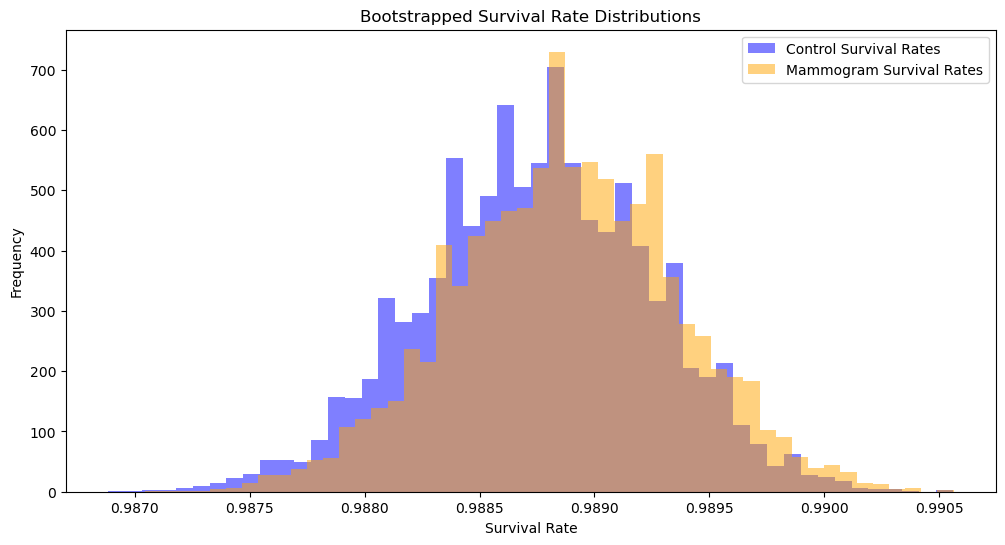

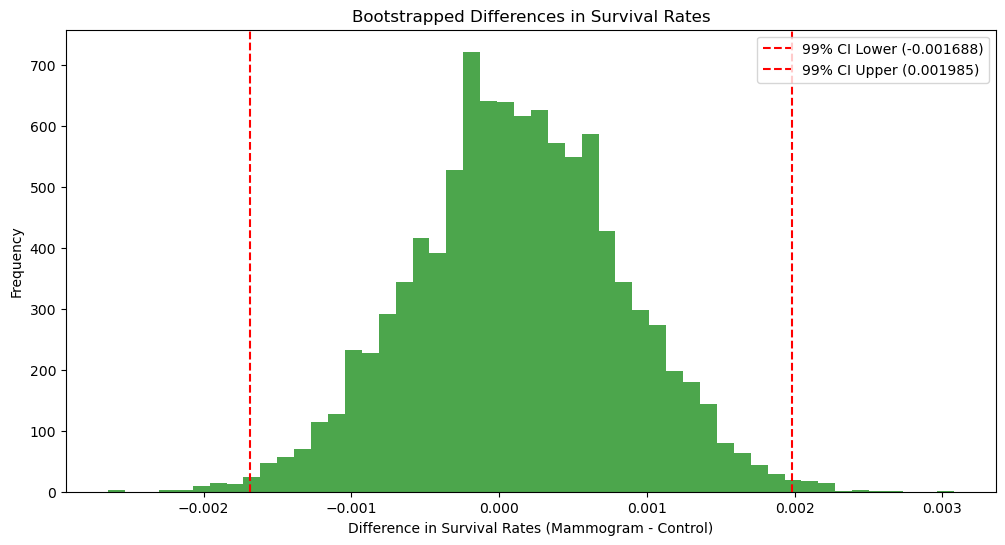

In [ ]:
import numpy as np
import pandas as pd

# Convert the outcome column to a boolean array: True for 'no', False otherwise
data['is_no'] = data['breast_cancer_death'] == 'no'

def bootstrap_survival_np(data, treatment_group, n_bootstrap=10000):
    """
    Optimized bootstrap survival rates for a specific group using numpy.
    """
    # Filter the data for the given treatment group
    group_data = data[data['treatment'] == treatment_group]['is_no'].values
    n_samples = len(group_data)
    
    # Generate bootstrap samples and compute survival rates
    bootstrap_samples = np.random.choice(group_data, (n_bootstrap, n_samples), replace=True)
    survival_rates = bootstrap_samples.mean(axis=1)  # Mean along rows gives survival rate
    return survival_rates

# Run bootstrapping for both groups
control_survival = bootstrap_survival_np(data, 'control')
mammogram_survival = bootstrap_survival_np(data, 'mammogram')

# Compute the difference in survival rates
bootstrap_diff = mammogram_survival - control_survival

# Summary statistics
print(f"Mean survival difference: {bootstrap_diff.mean():.4f}")
print(f"95% CI: {np.percentile(bootstrap_diff, [2.5, 97.5])}")

# Step 3: 99% confidence interval
ci_99 = np.percentile(bootstrap_diff, [0.5, 99.5])

print(f"99% Confidence Interval for Difference in Survival Rates: {ci_99}")

# Step 4: Plotting
plt.figure(figsize=(12, 6))
plt.hist(control_survival, bins=50, alpha=0.5, label="Control Survival Rates", color="blue")
plt.hist(mammogram_survival, bins=50, alpha=0.5, label="Mammogram Survival Rates", color="orange")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.title("Bootstrapped Survival Rate Distributions")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(bootstrap_diff, bins=50, alpha=0.7, color="green")
plt.axvline(ci_99[0], color='red', linestyle='--', label=f"99% CI Lower ({ci_99[0]:.6f})")
plt.axvline(ci_99[1], color='red', linestyle='--', label=f"99% CI Upper ({ci_99[1]:.6f})")
plt.xlabel("Difference in Survival Rates (Mammogram - Control)")
plt.ylabel("Frequency")
plt.title("Bootstrapped Differences in Survival Rates")
plt.legend()
plt.show()

In [ ]:
'''
The 99% confidence interval includes zero, indicating that the difference in 25-year
survival rates between the mammogram and control groups is not statistically 
significant. This suggests that, based on these data, mammograms may not result 
in a measurable improvement in long-term breast cancer survival rates. However, 
before drawing firm conclusions, several important questions need to be 
considered. Were mammograms randomly assigned? If not, there could be selection 
bias. For instance, individuals who are wealthier or in better overall health 
might be more likely to undergo mammograms. These individuals may naturally have a 
lower prevalence of breast cancer, which could mask the potential benefits of 
mammograms. Are there other significant risk factors for breast cancer? 
While mammograms may not show a broad benefit across the entire population, they could be highly 
effective for certain subgroups, such as those at higher risk for breast cancer.
This analysis focuses solely on mortality rates, but there could be other 
benefits of early detection through mammograms. For example, even if survival 
rates are similar, early detection might reduce the need for aggressive 
treatments like chemotherapy, thereby improving quality of life for patients.
'''

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?